In [15]:
from sklearn import cluster, datasets,metrics
import pandas as pd
import matplotlib.pyplot as plt


zoo = pd.read_csv("zoo.csv") 
zoo.head(5)

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
zoo.keys()

Index(['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [16]:
zoo.shape

(101, 18)

In [30]:
zoo_SP = zoo[['hair','feathers','eggs','milk','airborne',
              'aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail',
              'domestic','catsize','type']]
zoo_SP.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


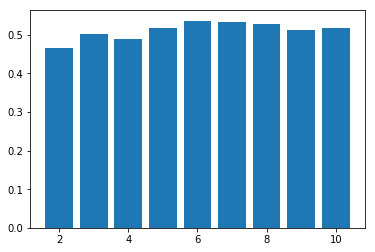

[0.46651653777766294, 0.5012515272738854, 0.4889999486359166, 0.5178405035675374, 0.5368124800417283, 0.5343312829061678, 0.5273944490826207, 0.5135341559235859, 0.5170539785521583]


In [31]:
silhouette_avgs=[]

ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(zoo_SP)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(zoo_SP, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)